# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following :
    
● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
filename='iris.xls'
df=pd.read_excel(filename)

In [2]:
df=pd.read_csv('Sales_data_zone_wise.csv')

# Descriptive Analysis

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  29 rows and  5 columns in the dataset.


In [6]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

Inference: There are no null values in the dataset.

# Schema of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [8]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# 1. The mean sales generated by each zone.

In [9]:
df.drop('Month',axis=1).mean().apply(lambda x: '%.5f' % x)

Zone - A    1540493.13793
Zone - B    1755559.58621
Zone - C    1772871.03448
Zone - D    1842926.75862
dtype: object

The above code gives the mean sales generated by each zone. We can clearly see that the mean sales in the Zone - D is the highest and that of Zone - A is the lowest.

# 2. Total sales generated by all the zones for each month.

In [10]:
column_list = list(df)
column_list.remove("Month")
df1=df
df1["Total sales per month of all zones"]= df[column_list].sum(axis=1)
df1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total sales per month of all zones
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [11]:
df1['Total sales per month of all zones'].max()

8174449

In [12]:
df1['Total sales per month of all zones'].min()

5925424

The maximum of total sales made in each month by all zones are given above. 

We can see that:

1)Month - 4 has made maximum sales

2)Month - 13 has made minimum sales 

# 3. Check whether all the zones generate the same amount of sales.

H0 -> μA = μB = μC = μD(where μ = mean, We assume that the mean sales of all the zones are equal)

Ha -> At least one difference among the mean sales.

In [13]:
from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

The F test statistic is 5.672056106843581 and the corresponding p-value is 0.0011827601694503335. Since the p-value is less than .05, we reject the null hypothesis.

This means we have sufficient evidence to say that there is a difference in sales among the four zones.

<AxesSubplot:>

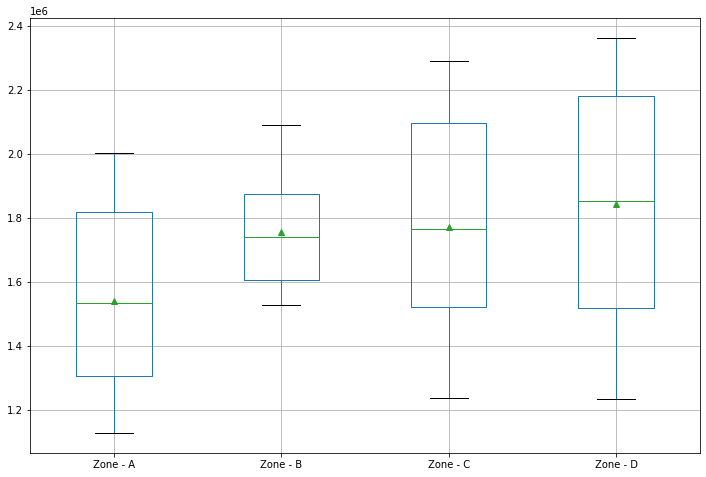

In [14]:
df.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'], figsize=(12, 8), showmeans=True)

From the box plot we can see that Zone A sales has a difference when compared to that of Zone - B, Zone - C and Zone - D since the median of Zone - A lies outside the boxes of Zone - B, Zone - C and Zone - D.

The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have different variance.

By default box plots show the median (green line in graph above). The green triangle is the mean for each group.

<h3>Submitted By: Midhuna Prasad R</h3>
    
<h3>Norka DSA Batch 02 2021</h3>

<h3>Submitted on: 22/12/2021</h3>